# Remoción parcial de componentes
<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
En este documento se presenta la técnica de remoción parcial de componentes de una red eléctrica. Esta técnica es sumamente útil para la síntesis de funciones transferencia, ya que permitirá localizar ceros de transmisión de la función transferencia, a una determinada frecuencia. Esto se traslada a la síntesis de funciones de excitación como tanques que resuenan a dicha frecuencia. Se hace una introducción con los aspectos teóricos más relevantes, y se termina con ejemplos de aplicación.

* Funciones de síntesis de dipolos: [remover_polo_jw](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/remociones/index.html#pytc2.remociones.remover_polo_jw)[remover_polo_dc](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/remociones/index.html#pytc2.remociones.remover_polo_dc)
* Funciones para presentación de markdown y latex: [print_subtitle](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.print_subtitle), [print_latex](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.print_latex), [a_equal_b_latex_s](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.a_equal_b_latex_s)



### Introducción

Hasta el momento se describieron las propiedades matemáticas que deben cumplir las funciones de excitación (FE), que se denominan *inmitancias*, para poder ser implementadas mediante redes eléctricas pasivas que constan de dos tipos de componentes: LC, RL y RC. En todos los casos, se plantearon métodos sistemáticos y canónicos (Foster y Cauer) para obtener dichas redes. En ambos casos, los componentes quedaron asociados a los **polos** de las FE y sus respectivos valores a los **residuos** en cada polo. Cada componente será **removido** de la FE para dar lugar a una red remanente más simple. Sea 

$$ F(s)=\frac{P(s)}{Q(s)} $$

una función de variable compleja $s$, siendo $F(s)$ real y positiva (FRP), podemos decir que para los tres casos antedichos, sus formas matemáticas pueden describirse como:

$$ F_{LC}(s)= \frac{k_0}{s} + k_\infty.s + \sum_{i=1}^N\frac{2.k_i.s}{s^2+\omega_i^2}$$

$$ F_{RC}(s)= \frac{k_0}{s} + k_K + \sum_{i=1}^N\frac{k_i}{s+\sigma_i} $$

$$ F_{RL}(s)= k_K + s. k_\infty + \sum_{i=1}^N\frac{k_i.s}{s+\sigma_i} $$

para cualquiera de los 3 casos, podemos plantear la remoción **total** de un polo, por ejemplo de una red LC, de las siguientes maneras:

$$ F_{21} = F_{LC} - \frac{k_0}{s} $$

$$ F_{22} = F_{LC} - k_\infty.s $$

$$ F_{21} = F_{LC} - \frac{2.k_i.s}{s^2+\omega_i^2} $$

Para los 3 casos resultan 3 inmitancias diferentes, todas del mismo origen LC que $F_{LC}(s)$ (no disipativo), dado que para las 3 remociones, a una red LC se le quitan o inductores, o capacitores, o tanques resonantes (capacitores e inductores). Como se ha dicho, los valores de cada componente dependen de $k_0$, $k_\infty$ y $2.k_i$. Lo que condicionará si la remoción es **total o parcial** es si la cantidad de residuo que se termina removiendo es un **valor real menor** al residuo en dicho polo, es decir

$$ F^p_{21} = F_{LC} - \frac{k^p_0}{s}; \quad \mathrm{Si} \enspace 0 < k^p_0 < k_0 $$

$$ F^p_{22} = F_{LC} - k^p_\infty.s ; \quad \mathrm{Si} \enspace 0 < k^p_\infty < k_0 $$

$$ F^p_{23} = F_{LC} - \frac{2.k^p_i.s}{s^2+\omega_i^2}; \quad \mathrm{Si} \enspace 0 < k^p_i < k_0  $$

Para cada caso, se remueve **parte de cada polo** con la finalidad de situar un **cero** de la inmitancia $ F^p_{2x} $ en una posición arbitraria $\omega_i$. Es decir que 

$$ F^p_{2x} \Big\vert_{s = j\omega_i}  = 0$$

Aprovechando esta igualdad podemos calcular los residuos parciales $k^p_x$

$$ k^p_0 = \left[ s . F_{LC} \right]_{s = j\omega_i} $$

$$ k^p_\infty = \left[ \frac{F_{LC}}{s} \right]_{s = j\omega_i} $$

$$ k^p_i = \left[ \frac{s^2+\omega_i^2}{s} . F_{LC} \right]_{s = j\omega_i} $$

De esta manera, se logra el objetivo de la remoción parcial de un polo, para asegurar que $ F^p_{2x} \Big\vert_{s = j\omega_i} = 0$. Se verá a continuación algunos casos donde esta técnica resulta útil.

In [1]:

import sympy as sp
from schemdraw import Drawing

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s, s
from IPython.display import display,  Markdown

# Importante importar símbolos de variables 
from pytc2.general import s


### Ejemplo 1: Red no disipativa

Sea la admitancia de entrada de la siguiente red 

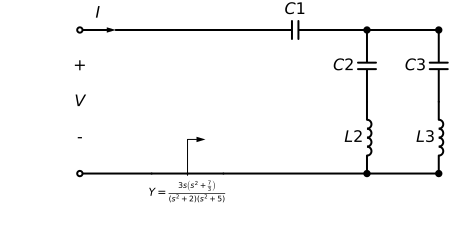

In [2]:
# Resolución simbólica

# Sea la siguiente función de excitación
YY = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)

# Red ejemplo 1
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 YY, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, 'C', 'C1')

d = dibujar_tanque_derivacion(d, 'L2', 'C2')

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_derivacion(d, 'L3', 'C3')

display(d)



Se desea calcular los valores de la red si $L_2$ y $C_2$ resuenan a 1 r/s.

### Resolución posible

Se procede a analizar la admitancia de entrada y las posibilidades para la síntesis de la red pedida

In [3]:

print_subtitle('Admitancia de entrada a la red')

print_latex(a_equal_b_latex_s('Y(s)', YY))

# calculamos polos y ceros de Y(s)
num, den = YY.as_numer_denom()

roots_num = sp.solve(num, s, dict=True)
print(roots_num)

roots_den = sp.solve(den, s, dict=True)
print(roots_den)

#### Admitancia de entrada a la red

<IPython.core.display.Math object>

[{s: 0}, {s: -sqrt(21)*I/3}, {s: sqrt(21)*I/3}]
[{s: -sqrt(2)*I}, {s: sqrt(2)*I}, {s: -sqrt(5)*I}, {s: sqrt(5)*I}]


a continuación se hace un diagrama de polos y ceros de $Y(s)$, y se esquematiza una posible solución para forzar que L2 y C2 resuenen a 1 r/s, justamente mediante una remoción parcial del residuo en 0 Hz.

![RP1](./img/rem_parcial_1.png)


In [4]:
# Restricción circuital: L2*C2 = 1 r/s
# remoción parcial en DC de 1/YY

omega_L2C2 = 1

Z2, Zc1 = remover_polo_dc(1/YY, omega_zero = omega_L2C2 )

# Yc1 es la admitancia removida
# extraigo C1
C1 = 1/(s*Zc1)

print_latex(a_equal_b_latex_s('Z_1(s) = \\frac{k^p_0}{s}', Zc1))
print_latex(a_equal_b_latex_s('Z_2(s)', Z2))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Se observa cómo se logra el efecto deseado: que $Z_2$ **tenga un cero en 1 r/s**. Luego se procede a remover el tanque L2 - C2 de $\frac{1}{Z_2}$

In [5]:

Y4, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2 )

print_latex(a_equal_b_latex_s('Y_3(s)', Yt2))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Se observa finalmente que al remover el tanque L2-C2, es decir $Y_3(s)$, solo resta a la red $Y_4(s)$ para concluir la síntesis.

In [6]:
# quedaría solo un tanque en Y4, no especifico omega.
Y6, Yt3, L3, C3 = remover_polo_jw(Y4, isImpedance = False)

print_latex(a_equal_b_latex_s('Y_5(s)', Yt3))
print_latex(a_equal_b_latex_s('Y_6(s)', Y6))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Continuando de forma sistemática, removemos el tanque $Y_5(s)$ de $Y_4(s)$, resultando una admitancia remanente $Y_6(s)$. Como se observa, $Y_5(s)$ no es otra cosa más que $Y_4(s)$, como lo habíamos anticipado, e $Y_6(s)$ es una **admitancia nula que nos indica que la síntesis ha finalizado satisfactoriamente**.

Finalmente se dibuja la red hallada con los valores de componentes.

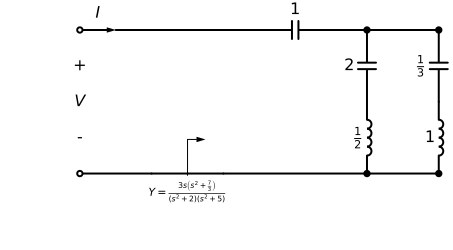

In [7]:
# Dibujamos la red resultante:

d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 YY, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, 'C', C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_derivacion(d, L3, C3)

display(d)

Con esto se concluye el primer ejemplo.

### Ejemplo 2: Red disipativa

Sea la impedancia de entrada de un dipolo

$$ Z(s) = \frac{s^2 + 13s + 32}{ 3s^2 + 27s+ 44} $$

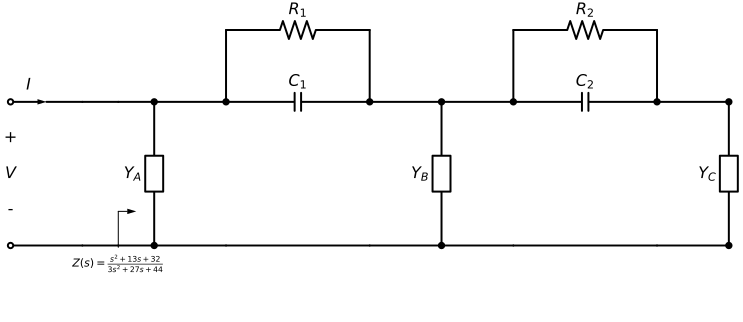

In [8]:
# Sea la siguiente función de excitación
ZZ = (s**2 + 13*s + 32)/(3*s**2 + 27*s+ 44)

# Red ejemplo 2
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_funcion_exc_abajo(d, 
                 'Z(s)',  
                 ZZ, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_derivacion(d, 'Y', 'Y_A')

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_RC_serie(d, resistor_label='R_1', capacitor_lbl='C_1' )

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, 'Y', 'Y_B')

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_RC_serie(d, resistor_label='R_2', capacitor_lbl='C_2' )

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, 'Y', 'Y_C')

display(d)

Se pide hallar $Y_A$, $Y_B$ e $Y_C$ calcular los valores de la red, si $R_1.C_1 = 1\,s$ y $R_2.C_2 = \frac{1}{4}\,s$.

### Resolución posible

Se comienza analizando su diagrama de polos y ceros

In [9]:
# calculamos polos y ceros de Z(s)
import numpy as np

roots_num = np.roots([1, 13, 32])
print(roots_num)

roots_den = np.roots([3, 27, 44])
print(roots_den)

[-9.70156212 -3.29843788]
[-6.86290781 -2.13709219]


y planteando una posible síntesis a partir del diagrama de polos y ceros de $Z(s)$. Si se sabe que $R_1.C_1 = 1\,s$, entonces se buscará hacer una remoción parcial en DC de forma tal que $Y_2$ tenga un cero en 1 r/s.

![RP2](./img/rem_parcial_2.png)


In [10]:
# Restricción circuital: R1*C1 = 1 s
# remoción parcial en DC de 1/ZZ

from pytc2.remociones import remover_valor_en_dc, remover_valor_en_infinito, remover_polo_sigma

sigma_R1C1 = -1

Y2, YA = remover_valor_en_dc(1/ZZ, sigma_zero = sigma_R1C1 )


print_latex(a_equal_b_latex_s('Y_A', YA))
print_latex(a_equal_b_latex_s('Y_2', Y2))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

como se observa, al remover $Y_A$ (resistor de 1Ω) logramos colocar el cero en 1 r/s y procedemos a remover el tanque R1-C1 en el siguiente paso. Por otro lado, la localización del segundo cero que no se podía anticipar por el método gráfico, ahora queda claro que está en $s = -6$, del mismo modo que los valores extremos en DC e infinito.


![RP3](./img/rem_parcial_3.png)



In [11]:
# removemos R1-C1
Z4, ZR1C1, R1, C1 = remover_polo_sigma(1/Y2, sigma = sigma_R1C1, isImpedance = True, isRC = True )

print_latex(a_equal_b_latex_s('Z_3', ZR1C1))
print_latex(a_equal_b_latex_s('Z_4', Z4))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

ahora procedemos a repensar el diagrama de polos y ceros de cara a remover R2-C2 de $Y_6(s)$, que sabemos resuena en 4 r/s.

![RP4](./img/rem_parcial_4.png)


In [12]:
sigma_R2C2 = -4

Y6, YB = remover_valor_en_dc(1/Z4, sigma_zero = sigma_R2C2 )

print_latex(a_equal_b_latex_s('Y_B', YB))
print_latex(a_equal_b_latex_s('Y_6', Y6))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

nuevamente, al remover $Y_B$ (otro resistor de 1Ω) logramos colocar el cero en 4 r/s y procedemos a remover el tanque R2-C3 en el siguiente paso, al mismo tiempo que se devela la información del diagrama de polos y ceros.


![RP5](./img/rem_parcial_5.png)


In [13]:
# removemos R1-C1
Z8, ZR2C2, R2, C2 = remover_polo_sigma(1/Y6, sigma = sigma_R2C2, isImpedance = True, isRC = True )

print_latex(a_equal_b_latex_s('Z_7', ZR2C2))
print_latex(a_equal_b_latex_s('Z_8', Z8))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

finalmente, al remover $Z_7$ queda resuelta la síntesis dado que $Y_C$ resulta ser otro resistor de 1Ω. 

![RP6](./img/rem_parcial_6.png)

De esta manera concluye el ejemplo y la red final resultante es

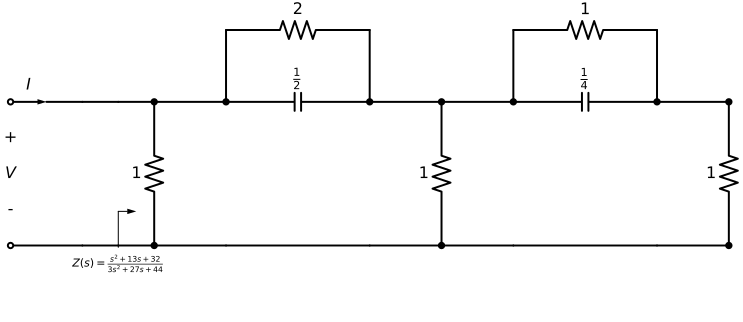

In [14]:
# Red ejemplo 2
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_funcion_exc_abajo(d, 
                 'Z(s)',  
                 ZZ, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_derivacion(d, 'R', YA)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_RC_serie(d, resistor_label= R1, capacitor_lbl= C1 )

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, 'R', YB)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_RC_serie(d, resistor_label = R2, capacitor_lbl = C2 )

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, 'R', 1/Z8)

display(d)